# Load and EDA
  

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Product_Reviews (1).csv')
df.head()

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,I initially had trouble deciding between the p...,POSITIVE
1,AVpe7AsMilAPnD_xQ78G,Allow me to preface this with a little history...,POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,I bought one of the first Paperwhites and have...,POSITIVE
4,AVpe7AsMilAPnD_xQ78G,I have to say upfront - I don't like coroporat...,POSITIVE


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Product_Reviews (1).csv')
df.tail()

,Product ID,Product Review,Sentiment
1002,AVpfo9ukilAPnD_xfhuj,This is not the same remote that I got for my ...,NEUTRAL
1003,AVpfo9ukilAPnD_xfhuj,I have had to change the batteries in this rem...,NEGATIVE
1004,AVpfo9ukilAPnD_xfhuj,"Remote did not activate, nor did it connect to...",NEGATIVE
1005,AVpfo9ukilAPnD_xfhuj,It does the job but is super over priced. I fe...,NEUTRAL
1006,AVpfo9ukilAPnD_xfhuj,I ordered this item to replace the one that no...,NEGATIVE


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Product_Reviews (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      1007 non-null   object
 1   Product Review  1007 non-null   object
 2   Sentiment       1007 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Product_Reviews (1).csv')
df.describe()

,Product ID,Product Review,Sentiment
count,1007,1007,1007
unique,66,908,3
top,AVpfpK8KLJeJML43BCuD,I'm a huge fan of the Echo family. I have two ...,POSITIVE
freq,542,6,852


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Product_Reviews (1).csv')
df.isnull().sum()

,0
Product ID,0
Product Review,0
Sentiment,0


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Product_Reviews (1).csv')
df.columns

Index(['Product ID', 'Product Review', 'Sentiment'], dtype='object')

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Product_Reviews (1).csv')
df.nunique()

,0
Product ID,66
Product Review,908
Sentiment,3


In [ ]:
# All at once
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe(include='all'))
print(df.nunique())
print(df.isnull().sum())


(1007, 3)
Index(['Product ID', 'Product Review', 'Sentiment'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      1007 non-null   object
 1   Product Review  1007 non-null   object
 2   Sentiment       1007 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB
None
                  Product ID  \
count                   1007   
unique                    66   
top     AVpfpK8KLJeJML43BCuD   
freq                     542   

                                           Product Review Sentiment  
count                                                1007      1007  
unique                                                908         3  
top     I'm a huge fan of the Echo family. I have two ...  POSITIVE  
freq                                                    6       852  
Product ID         66
Product Review  

In [ ]:
print(df.duplicated().sum())
df = df.drop_duplicates()

2


# Balancing

In [ ]:
# Separate features (X) and target (y)
X = df['Product Review']
y = df['Sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# Step 1: Vectorize the text data (convert to numeric)
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(df['Product Review'])

# Step 2: Extract target
y = df['Sentiment']

# Step 3: Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_vectorized, y)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['Product Review']], df['Sentiment'])


In [ ]:
from collections import Counter

print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_res))


Before SMOTE: Counter({'POSITIVE': 850, 'NEUTRAL': 81, 'NEGATIVE': 74})
After SMOTE: Counter({'POSITIVE': 850, 'NEUTRAL': 850, 'NEGATIVE': 850})


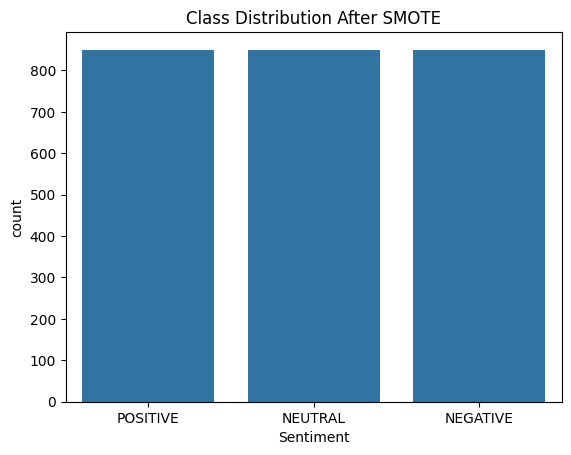

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_res)
plt.title("Class Distribution After SMOTE")
plt.show()


# data cleaning


Number of outlier rows: 0
Percentage of outliers: 0.00%

Sample outlier rows:
Empty DataFrame
Columns: [Product ID, Product Review, Sentiment]
Index: []

Individual number of outliers per column:


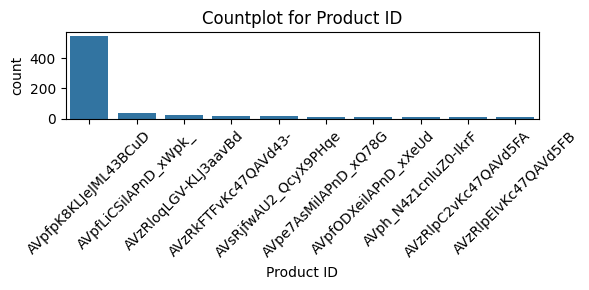

/tmp/ipython-input-16-1738762190.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


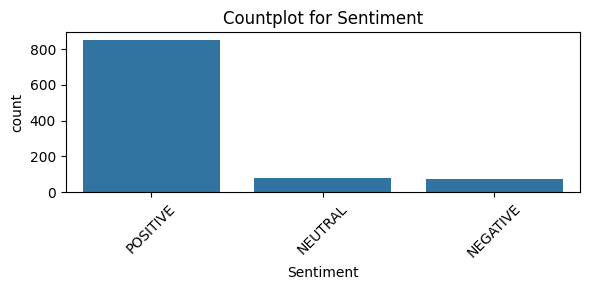

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Product_Reviews (1).csv')
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate IQR for each numeric column
iqr = numeric_df.quantile(0.75) - numeric_df.quantile(0.25)
lower_bound = numeric_df.quantile(0.25) - 1.5 * iqr
upper_bound = numeric_df.quantile(0.75) + 1.5 * iqr

# Identify rows with any outlier
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)

print("Number of outlier rows:", outliers.sum())
print("Percentage of outliers: {:.2f}%".format((outliers.sum() / len(df)) * 100))
print("\nSample outlier rows:")
print(df[outliers].head())

# Outlier count per column
outlier_counts = {}
for col in numeric_df.columns:
    col_outliers = ((numeric_df[col] < lower_bound[col]) | (numeric_df[col] > upper_bound[col]))
    outlier_counts[col] = col_outliers.sum()
    if col_outliers.sum() > 0:
        print(f"\nOutliers in column '{col}':")
        print(df.loc[col_outliers, col].head())

print("\nIndividual number of outliers per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Countplots for categorical features
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df, order=df[col].value_counts().head(10).index)  # limit to top 10
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
outlier_counts = {}
for col in numeric_df.columns:
    col_outliers = ((numeric_df[col] < lower_bound[col]) | (numeric_df[col] > upper_bound[col]))
    outlier_counts[col] = col_outliers.sum()
    if col_outliers.sum() > 0:
        print(f"Outliers in column '{col}':")
        print(df.loc[col_outliers, col])

print("\nIndividual number of outliers per column:")
for col, count in outlier_counts.items():
    print(f"'{col}': {count}")



Individual number of outliers per column:


In [ ]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv("Product_Reviews (1).csv")

# Define function to remove special characters
def clean_text(text):
    text = str(text)  # Ensure it's a string
    cleaned = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove everything except letters, numbers, and space
    return cleaned

# Apply the function to create a cleaned review column
df['Cleaned Review'] = df['Product Review'].apply(clean_text)

# Preview the cleaned data
print(df[['Product Review', 'Cleaned Review']].head())


                                      Product Review  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                      Cleaned Review  
0  I initially had trouble deciding between the p...  
1  Allow me to preface this with a little history...  
2  I am enjoying it so far Great for reading Had ...  
3  I bought one of the first Paperwhites and have...  
4  I have to say upfront  I dont like coroporate ...  


In [ ]:
def clean_text(text):
    text = str(text).lower()  # Convert to string and lowercase it
    cleaned = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return cleaned
df['Cleaned Review'] = df['Product Review'].apply(clean_text)
print(df[['Product Review', 'Cleaned Review']].head())

                                      Product Review  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                      Cleaned Review  
0  i initially had trouble deciding between the p...  
1  allow me to preface this with a little history...  
2  i am enjoying it so far great for reading had ...  
3  i bought one of the first paperwhites and have...  
4  i have to say upfront  i dont like coroporate ...  


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv("Product_Reviews (1).csv")

# Define stopword set
stop_words = set(stopwords.words('english'))

# Define cleaning function: lowercase + remove special characters + remove stopwords
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # remove special characters
    words = text.split()  # tokenize
    words = [word for word in words if word not in stop_words]  # remove stopwords
    return ' '.join(words)  # join back

# Apply the function to the dataset
df['Cleaned Review'] = df['Product Review'].apply(clean_text)

# Preview cleaned reviews
print(df[['Product Review', 'Cleaned Review']].head())


                                      Product Review  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                      Cleaned Review  
0  initially trouble deciding paperwhite voyage r...  
1  allow preface little history casual reader own...  
2  enjoying far great reading original fire since...  
3  bought one first paperwhites pleased constant ...  
4  say upfront dont like coroporate hermetically ...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv("Product_Reviews (1).csv")

# Get English stopwords and remove 'not' and 'no'
stop_words = set(stopwords.words('english')) - {'not', 'no'}

# Define cleaning function
def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords except 'not' and 'no'
    return ' '.join(words)  # Join back

# Apply to DataFrame
df['Cleaned Review'] = df['Product Review'].apply(clean_text)

# Preview results
print(df[['Product Review', 'Cleaned Review']].head())


                                      Product Review  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                      Cleaned Review  
0  initially trouble deciding paperwhite voyage r...  
1  allow preface little history casual reader own...  
2  enjoying far great reading original fire since...  
3  bought one first paperwhites pleased constant ...  
4  say upfront dont like coroporate hermetically ...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#dd


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("happiness", pos="n"))  # pos="n" for noun

[nltk_data] Downloading package wordnet to /root/nltk_data...


happiness


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem("happiness"))


happi


In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("happiness", pos="n"))  # pos="n" for noun

happiness


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['Lemmatized Review'] = df['Cleaned Review'].apply(lemmatize_text)

print(df[['Cleaned Review', 'Lemmatized Review']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                      Cleaned Review  \
0  initially trouble deciding paperwhite voyage r...   
1  allow preface little history casual reader own...   
2  enjoying far great reading original fire since...   
3  bought one first paperwhites pleased constant ...   
4  say upfront dont like coroporate hermetically ...   

                                   Lemmatized Review  
0  initially trouble deciding paperwhite voyage r...  
1  allow preface little history casual reader own...  
2  enjoying far great reading original fire since...  
3  bought one first paperwhites pleased constant ...  
4  say upfront dont like coroporate hermetically ...  


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=1000)
X_bow = bow.fit_transform(df['Lemmatized Review'])

print(X_bow.shape)

(1007, 1000)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
data = ["This is text", "This is another text", "Another text"]

# Initialize CountVectorizer
bow = CountVectorizer()

# Fit and transform the data
data_features_bow = bow.fit_transform(data)

# Convert sparse matrix to array
data_features_bow_array = data_features_bow.toarray()

# Get feature names (i.e., unique words)
words = bow.get_feature_names_out()

# Create a DataFrame for easy visualization
df_bow = pd.DataFrame(data_features_bow_array, columns=words)

# Show the Bag of Words representation
print(df_bow)


   another  is  text  this
0        0   1     1     1
1        1   1     1     1
2        1   0     1     0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Clean sample data
data = ["This is text", "Text another text", "Another text"]

# Initialize CountVectorizer
bow = CountVectorizer()

# Fit the model and transform the data
data_features_bow = bow.fit_transform(data)

# Convert the sparse matrix to array
data_features_bow_array = data_features_bow.toarray()

# Get feature names (unique tokens)
words = bow.get_feature_names_out()

# Create DataFrame
df_bow = pd.DataFrame(data_features_bow_array, columns=words)

# Display the result
print(df_bow)


   another  is  text  this
0        0   1     1     1
1        1   0     2     0
2        1   0     1     0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data
data = ["This is text", "Text another text", "Another text"]

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the data
data_tfidf = tfidf.fit_transform(data)

# Convert to array
data_tfidf_array = data_tfidf.toarray()

# Get feature names (tokens)
words = tfidf.get_feature_names_out()

# Create DataFrame
df_tfidf = pd.DataFrame(data_tfidf_array, columns=words)

# Display
print(df_tfidf)



    another        is      text      this
0  0.000000  0.652491  0.385372  0.652491
1  0.541343  0.000000  0.840802  0.000000
2  0.789807  0.000000  0.613356  0.000000


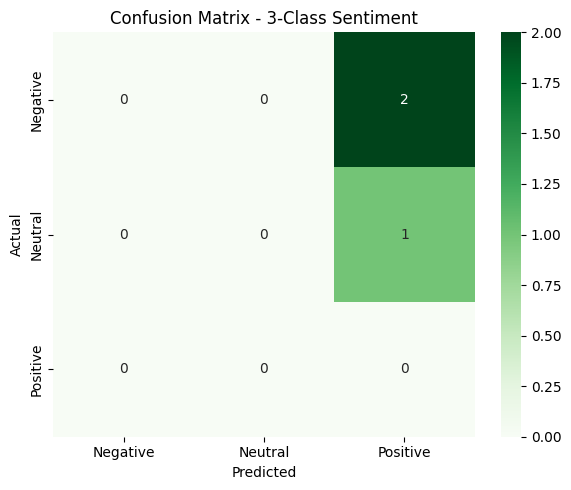

Classification Report:

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       2.0
     Neutral       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

# Example data (replace with your actual cleaned dataset)
df = pd.DataFrame({
    'Cleaned Review': [
        'I love this product',
        'It is terrible and bad',
        'It works okay, nothing great',
        'Absolutely fantastic',
        'Poor experience, not worth it',
        'Not bad, decent performance',
        'Great value for the price',
        'Horrible design and quality',
        'Average experience overall'
    ],
    'Sentiment': [
        'Positive', 'Negative', 'Neutral',
        'Positive', 'Negative', 'Neutral',
        'Positive', 'Negative', 'Neutral'
    ]
})

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Cleaned Review'])
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
labels = ['Negative', 'Neutral', 'Positive']
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - 3-Class Sentiment")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))


# word embeddings


In [ ]:
pip install gensim


In [ ]:
pip install nltk


In [ ]:
# Import libraries
import nltk
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary
from gensim.models import TfidfModel, Word2Vec, KeyedVectors
from gensim.models.phrases import Phrases, Phraser

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource

# Sample corpus
corpus = [
    "I love natural language processing",
    "I love deep learning",
    "Language models are amazing"
]

# ----------------------------
# 1. Tokenization
# ----------------------------
tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]
print("Tokenized Corpus:", tokenized_corpus)

# ----------------------------
# 2. Bag of Words (BoW)
# ----------------------------
dictionary = Dictionary(tokenized_corpus)
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]
print("\nBoW representation:")
for doc in bow_corpus:
    print(doc)  # (word_id, frequency)

# ----------------------------
# 3. TF-IDF
# ----------------------------
tfidf = TfidfModel(bow_corpus)
tfidf_corpus = [tfidf[doc] for doc in bow_corpus]
print("\nTF-IDF representation:")
for doc in tfidf_corpus:
    print(doc)  # (word_id, tfidf_weight)

# ----------------------------
# 4. N-grams (Bigrams Example)
# ----------------------------
phrases = Phrases(tokenized_corpus, min_count=1, threshold=1)
bigram = Phraser(phrases)
bigram_corpus = [bigram[doc] for doc in tokenized_corpus]
print("\nBigrams:")
print(bigram_corpus)

# ----------------------------
# 5. Word2Vec
# ----------------------------
w2v_model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)
print("\nWord2Vec vector for 'language':")
print(w2v_model.wv['language'])

# Find similar words
print("\nMost similar to 'language':")
print(w2v_model.wv.most_similar('language'))

# ----------------------------
# 6. GloVe (Pre-trained)
# ----------------------------
# You need to download GloVe from https://nlp.stanford.edu/projects/glove/ first
# Example assumes you have glove.6B.50d.txt in working dir

try:
    glove_model = KeyedVectors.load_word2vec_format('glove.6B.50d.txt', binary=False, no_header=True)
    print("\nGloVe vector for 'language':")
    print(glove_model['language'])
except FileNotFoundError:
    print("\n⚠ GloVe file not found. Download from https://nlp.stanford.edu/projects/glove/")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokenized Corpus: [['i', 'love', 'natural', 'language', 'processing'], ['i', 'love', 'deep', 'learning'], ['language', 'models', 'are', 'amazing']]

BoW representation:
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
[(0, 1), (2, 1), (5, 1), (6, 1)]
[(1, 1), (7, 1), (8, 1), (9, 1)]

TF-IDF representation:
[(0, 0.23780622519852498), (1, 0.23780622519852498), (2, 0.23780622519852498), (3, 0.6443386523290703), (4, 0.6443386523290703)]
[(0, 0.2448297500958463), (2, 0.2448297500958463), (5, 0.6633689723434505), (6, 0.6633689723434505)]
[(1, 0.2084041054460164), (7, 0.5646732768699807), (8, 0.5646732768699807), (9, 0.5646732768699807)]

Bigrams:
[['i_love', 'natural', 'language', 'processing'], ['i_love', 'deep', 'learning'], ['language', 'models', 'are', 'amazing']]

Word2Vec vector for 'language':
[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.

In [ ]:
import nltk
import os

# Set the NLTK data path to a writable directory
nltk_data_path = '/usr/local/nltk_data'
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)
nltk.data.path.append(nltk_data_path)

try:
    nltk.download('punkt_tab', download_dir=nltk_data_path)
    print("punkt_tab downloaded successfully.")
except Exception as e:
    print(f"Error downloading punkt_tab: {e}")

punkt_tab downloaded successfully.


[nltk_data] Downloading package punkt_tab to /usr/local/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# working_word2vec_example.py
import nltk
nltk.download('punkt', quiet=True)

from gensim.models import Word2Vec

# Prepare tokenized, lowercase sentences
sentences = [
    ["i", "love", "natural", "language", "processing"],
    ["i", "love", "deep", "learning"],
    ["language", "models", "are", "amazing"]
]

# ---------------------------
# Option A: Constructor builds vocab AND trains
# ---------------------------
model = Word2Vec(
    sentences=sentences,      # pass sentences here so gensim builds vocab & trains
    vector_size=50,
    window=5,
    min_count=1,              # include all words in this tiny corpus
    workers=2,
    epochs=50                 # number of training epochs
)

# ---------------------------
# Option B: Manual build_vocab() + train() (equivalent)
# ---------------------------
# model2 = Word2Vec(vector_size=50, window=5, min_count=1, workers=2)
# model2.build_vocab(sentences)                                 # build the vocab
# model2.train(sentences, total_examples=model2.corpus_count, epochs=model2.epochs)

# ---------------------------
# Usage / checks
# ---------------------------
# list vocabulary words
print("Vocab keys:", list(model.wv.key_to_index.keys()))

# ensure the words exist (case matters)
print("'language' in vocab?", "language" in model.wv.key_to_index)

# similarity between two words
sim = model.wv.similarity("love", "language")
print("Similarity(love, language) =", sim)

# vector for a word
vec = model.wv["language"]
print("Vector shape:", vec.shape)


Vocab keys: ['language', 'love', 'i', 'amazing', 'are', 'models', 'learning', 'deep', 'processing', 'natural']
'language' in vocab? True
Similarity(love, language) = 0.042437136
Vector shape: (50,)


#jj
